<a href="https://colab.research.google.com/github/greyweb/MIT_DeepLearning_Lab/blob/main/MNIST_Fashion/TfFashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hands on Machine Learning Book:

Fashion MNIST




Importing Packages



In [186]:
import tensorflow as tf 
import matplotlib.pyplot as plt
!pip install mitdeeplearning
import mitdeeplearning as mdl
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
assert len(tf.config.list_physical_devices('GPU')) > 0

MNIST Dataset

In [187]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)


Plotting Sample Images from the Datasets

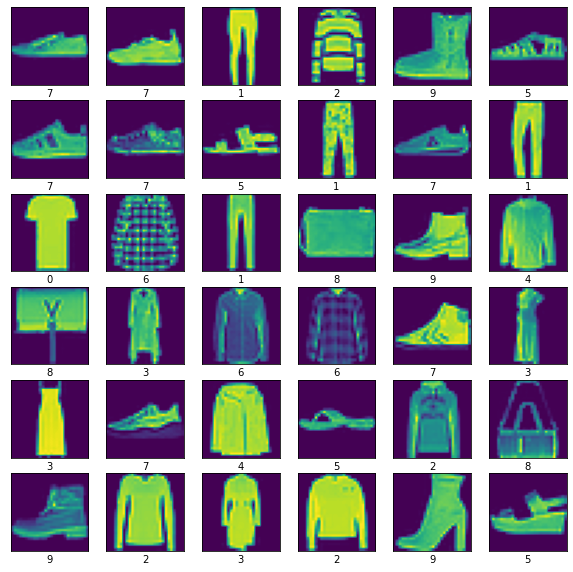

In [188]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap="viridis")
    plt.xlabel(train_labels[image_ind])

Fully Connected Model -1: 

In [189]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return fc_model

model = build_fc_model()

In [190]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [191]:
BATCH_SIZE = 64
EPOCHS = 15

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/15
938/938 [==============================] - 2s 2ms/step - loss: 0.5911 - accuracy: 0.7942
Epoch 2/15
938/938 [==============================] - 2s 2ms/step - loss: 0.4272 - accuracy: 0.8478
Epoch 3/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3850 - accuracy: 0.8609
Epoch 4/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3572 - accuracy: 0.8720
Epoch 5/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3390 - accuracy: 0.8783
Epoch 6/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3257 - accuracy: 0.8824
Epoch 7/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3131 - accuracy: 0.8860
Epoch 8/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3027 - accuracy: 0.8893
Epoch 9/15
938/938 [==============================] - 2s 2ms/step - loss: 0.2943 - accuracy: 0.8918
Epoch 10/15
938/938 [==============================] - 2s 2ms/step - loss: 0.2858 - accuracy: 0.8955

Testing the Model :

In [192]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8792
Test accuracy: 0.8791999816894531


CNN Model:

In [193]:
def build_cnn_model():
      model = tf.keras.Sequential()
      # Must define the input shape in the first layer of the neural network
      model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
      model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
      model.add(tf.keras.layers.Dropout(0.3))
      model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
      model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
      model.add(tf.keras.layers.Dropout(0.3))
      model.add(tf.keras.layers.Flatten())
      model.add(tf.keras.layers.Dense(256, activation='relu'))
      model.add(tf.keras.layers.Dropout(0.5))
      model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summar
    
      return model
  
model = build_cnn_model()
model.predict(train_images[[0]])
print(model.summary())

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 1568)            

Compile the Model:

In [194]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [195]:
history = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)


Epoch 1/15
938/938 [==============================] - 4s 4ms/step - loss: 0.5870 - accuracy: 0.7830
Epoch 2/15
938/938 [==============================] - 3s 4ms/step - loss: 0.4118 - accuracy: 0.8502
Epoch 3/15
938/938 [==============================] - 3s 4ms/step - loss: 0.3702 - accuracy: 0.8661
Epoch 4/15
938/938 [==============================] - 3s 4ms/step - loss: 0.3443 - accuracy: 0.8752
Epoch 5/15
938/938 [==============================] - 3s 4ms/step - loss: 0.3248 - accuracy: 0.8822
Epoch 6/15
938/938 [==============================] - 3s 4ms/step - loss: 0.3113 - accuracy: 0.8862
Epoch 7/15
938/938 [==============================] - 3s 4ms/step - loss: 0.3004 - accuracy: 0.8896
Epoch 8/15
938/938 [==============================] - 3s 4ms/step - loss: 0.2887 - accuracy: 0.8939
Epoch 9/15
938/938 [==============================] - 3s 4ms/step - loss: 0.2786 - accuracy: 0.8974
Epoch 10/15
938/938 [==============================] - 3s 4ms/step - loss: 0.2725 - accuracy: 0.8999

In [196]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2370 - accuracy: 0.9118
Test accuracy: 0.9118000268936157


In [197]:
predictions = model.predict(test_images)

In [198]:
predictions[0]

array([1.4764556e-10, 1.5221274e-09, 3.0205335e-11, 1.4494242e-09,
       1.3668257e-12, 1.4816981e-05, 7.2945289e-11, 1.2529563e-04,
       5.2471244e-10, 9.9985981e-01], dtype=float32)

In [199]:
predictions[15]

array([4.2269537e-08, 9.9999738e-01, 3.0263332e-09, 1.9168851e-06,
       6.6117207e-07, 9.3362141e-12, 1.7709345e-08, 8.0326384e-14,
       1.2047999e-10, 2.9912249e-12], dtype=float32)

In [200]:
prediction = np.argmax(predictions[0]) 
print(prediction)

9


In [201]:
prediction = np.argmax(predictions[15]) 
print(prediction)

1


Label of this digit is: 9


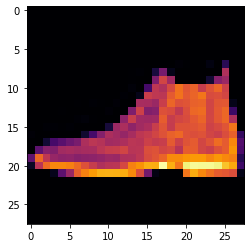

In [202]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.inferno)

Label of this digit is: 1


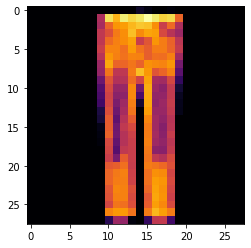

In [203]:
print("Label of this digit is:", test_labels[15])
plt.imshow(test_images[15,:,:,0], cmap="inferno")

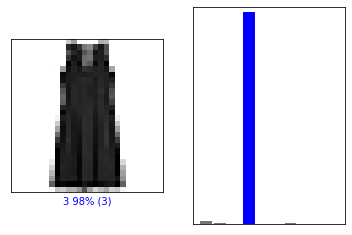

In [204]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 86 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

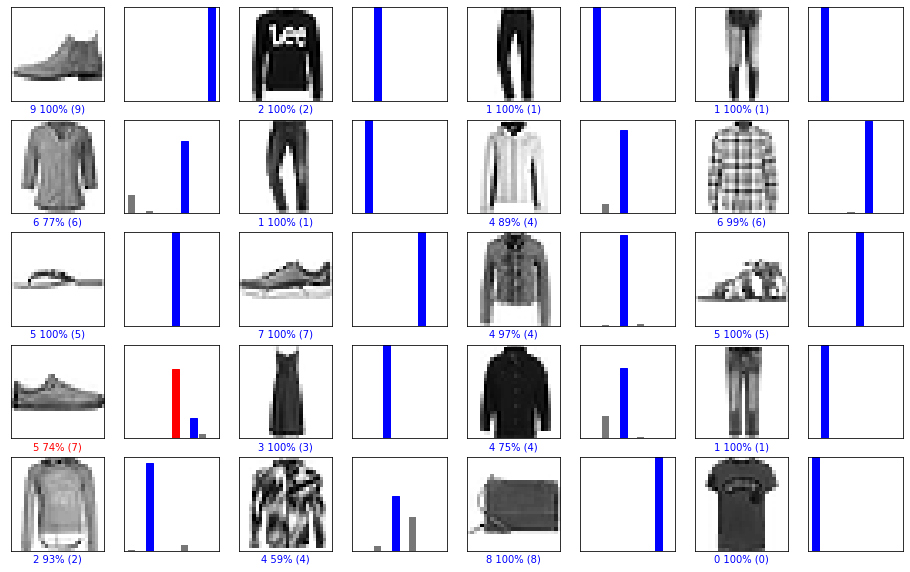

In [205]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

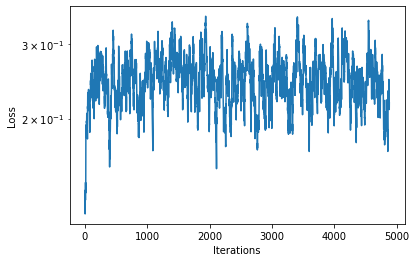

100%|██████████| 5000/5000 [00:36<00:00, 137.23it/s]


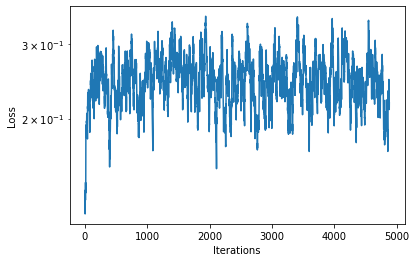

In [206]:
# Rebuild the CNN model
model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  with tf.GradientTape() as tape:
    logits = cnn_model(images)
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))

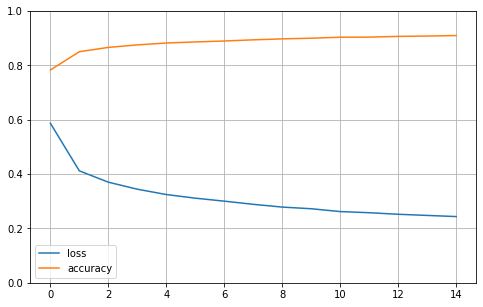

In [207]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()